In [32]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [33]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils

In [34]:
(x_training, y_training), (x_test, y_test) = mnist.load_data()

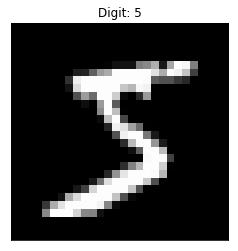

In [35]:
plt.imshow(x_training[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_training[0]))
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
print("x_training shape", x_training.shape)
print("y_training shape", y_training.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

#resizing
x_training = x_training.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_training = x_training.astype('float32')
x_test = x_test.astype('float32')

# normalizing 
x_training /= 255
x_test /= 255

# print the final input shape ready for training
print("Training shape", x_training.shape)
print("Test shape", x_test.shape)

x_training shape (60000, 28, 28)
y_training shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)
Training shape (60000, 784)
Test shape (10000, 784)


In [39]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [40]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [42]:
model.fit(x_training, y_training, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 59s 985us/step - loss: 0.2197 - acc: 0.93530s - loss: 0.2205 - ac
Epoch 2/5
60000/60000 [==============================] - 38s 629us/step - loss: 0.0952 - acc: 0.9714
Epoch 3/5
60000/60000 [==============================] - 36s 603us/step - loss: 0.0686 - acc: 0.9791
Epoch 4/5
60000/60000 [==============================] - 38s 630us/step - loss: 0.0549 - acc: 0.9824
Epoch 5/5
60000/60000 [==============================] - 35s 578us/step - loss: 0.0440 - acc: 0.9859: 0s - loss: 0.0438 - ac


In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 5s 472us/step
Test accuracy: 0.9807


In [45]:
predictions = model.predict(x_test)

In [81]:
def plot_image(i, predictions_array, true_y, x):
  predictions_array, true_y= predictions_array[i], true_y[i]
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(x.reshape(28,28), cmap='gray', interpolation='none')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_y:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("Predicted: {} {:2.0f}% (Truth: {})".format(predicted_label,
                                100*np.max(predictions_array), true_y,
                                color=color))


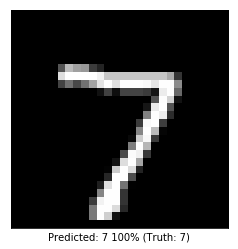

In [82]:
i = 0
plot_image(i, predictions, y_test, x_test[i])
plt.show()
